### Problem 2. Expectation Maximization (EM) for GMM (40 points)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats import multivariate_normal
plt.style.use('seaborn')

In [3]:
df=pd.read_csv('points.dat.txt', sep=' ', header=None)
df

,0,1
0,-6.367092,-0.352406
1,-0.089791,1.516617
2,0.228603,-3.400796
3,-5.373754,-0.346060
4,-0.252466,2.264652
...,...,...
995,-3.250677,-0.814128
996,-1.307515,1.123990
997,-2.554552,-4.718175
998,-0.201516,2.932802


In [4]:
X = np.stack((df[0], df[1]), axis = -1)
X.shape

(1000, 2)

In [5]:
X

array([[-6.3670924 , -0.35240556],
       [-0.08979119,  1.5166165 ],
       [ 0.22860334, -3.4007959 ],
       ...,
       [-2.5545522 , -4.7181746 ],
       [-0.20151563,  2.9328022 ],
       [-0.36624411, -3.0872141 ]])

In [6]:
# update W (Expectation)
def update_W(X, Mu, Var, Pi):
    n_points, n_clusters = len(X), len(Pi)
    pdfs = np.zeros(((n_points, n_clusters)))
    for i in range(n_clusters):
        pdfs[:, i] = Pi[i] * multivariate_normal.pdf(X, Mu[i], np.diag(Var[i]))
    W = pdfs / pdfs.sum(axis=1).reshape(-1, 1)
    return W

# update Pi (Mixture Weights)
def update_Pi(W):
    Pi = W.sum(axis=0) / W.sum()
    return Pi

# Calculate log-likelihood function
def logLH(X, Pi, Mu, Var):
    n_points, n_clusters = len(X), len(Pi)
    pdfs = np.zeros(((n_points, n_clusters)))
    for i in range(n_clusters):
        pdfs[:, i] = Pi[i] * multivariate_normal.pdf(X, Mu[i], np.diag(Var[i]))
    return np.mean(np.log(pdfs.sum(axis=1)))

# draw cluster plot
def plot_clusters(X, Mu, Var):
    colors = ['b', 'g', 'r']
    n_clusters = len(Mu)
    plt.figure(figsize=(10, 8))
    plt.axis([-10, 15, -5, 15])
    plt.scatter(X[:, 0], X[:, 1], s=5)
    ax = plt.gca()
    for i in range(n_clusters):
        plot_args = {'fc': 'None', 'lw': 2, 'edgecolor': colors[i], 'ls': ':'}
        ellipse = Ellipse(Mu[i], 3 * Var[i][0], 3 * Var[i][1], **plot_args)
        ax.add_patch(ellipse)      
    plt.show()



# update Mu (Means)
def update_Mu(X, W):
    n_clusters = W.shape[1]
    Mu = np.zeros((n_clusters, 2))
    for i in range(n_clusters):
        Mu[i] = np.average(X, axis=0, weights=W[:, i])
    return Mu


# update Var (Covariances)
def update_Var(X, Mu, W):
    n_clusters = W.shape[1]
    Var = np.zeros((n_clusters, 2))
    for i in range(n_clusters):
        Var[i] = np.average((X - Mu[i]) ** 2, axis=0, weights=W[:, i])
    return Var



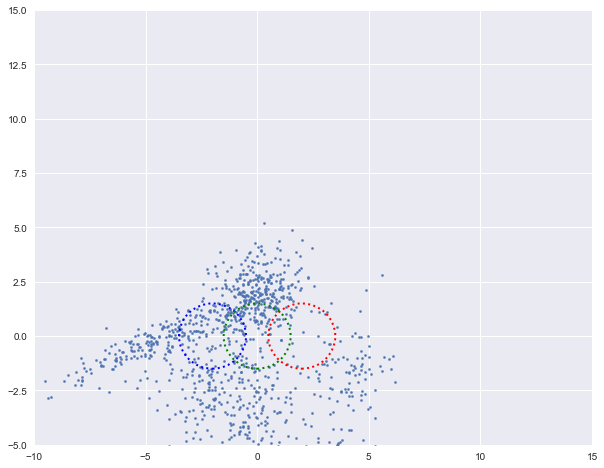

log-likehood:-7.520


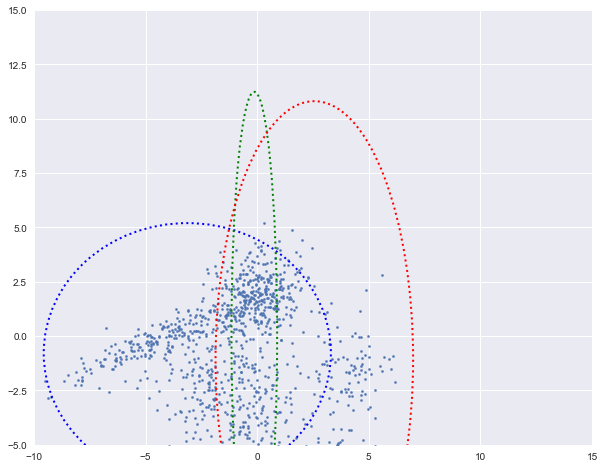

log-likehood:-4.694


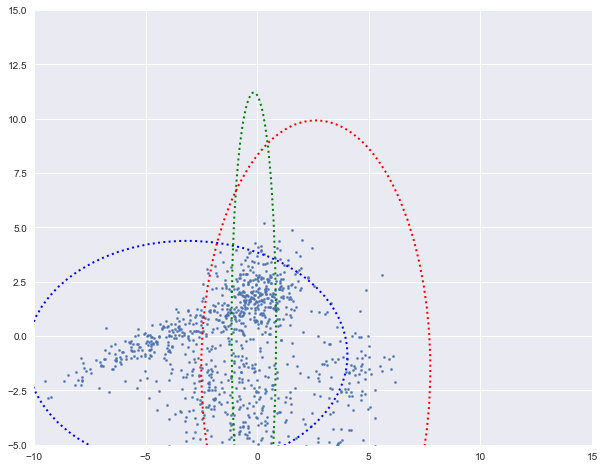

log-likehood:-4.676


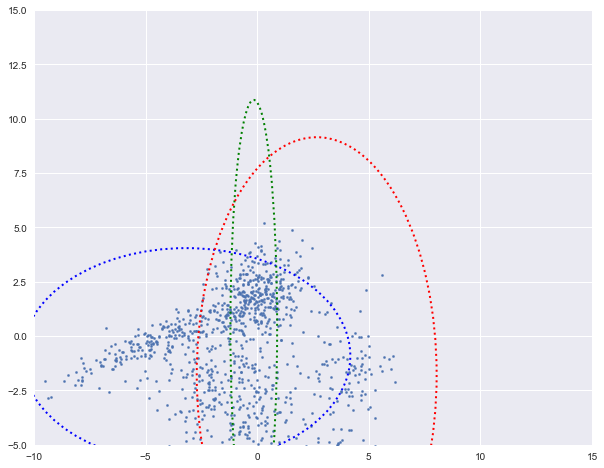

log-likehood:-4.670


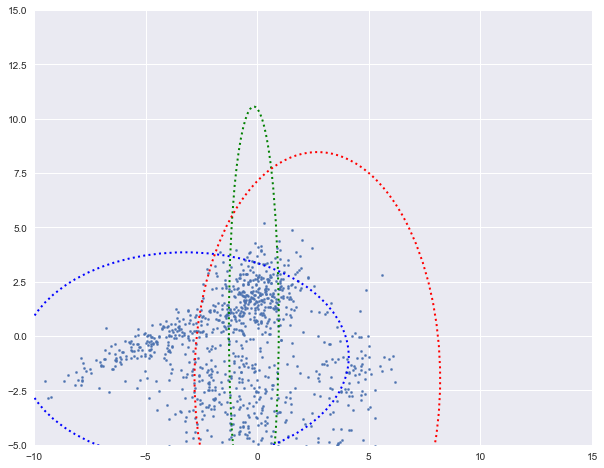

log-likehood:-4.666


In [7]:

if __name__ == '__main__':

    n_clusters = 3
    n_points = len(X)
    Mu = [[-2, 0], [0, 0], [2, 0]]
    Var = [[1, 1], [1,1], [1, 1]]
    Pi = [1 / n_clusters] * 3
    W = np.ones((n_points, n_clusters)) / n_clusters 
    Pi = W.sum(axis=0) / W.sum()

    loglh = []
    for i in range(5):
        plot_clusters(X, Mu, Var)
        loglh.append(logLH(X, Pi, Mu, Var))
        W = update_W(X, Mu, Var, Pi)
        Pi = update_Pi(W)
        Mu = update_Mu(X, W)
        print('log-likehood:%.3f'%loglh[-1])
        Var = update_Var(X, Mu, W)

We can see that log likelihood log is increasing for each iteration of EM